In [ ]:
import numpy as np
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statistics

(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

dim = 784
X_train = X_train.reshape(len(X_train), dim)
X_pred = X_pred.reshape(len(X_pred), dim)

In [ ]:
pca_full = PCA(n_components=dim, svd_solver='full')

X_full = pca_full.fit(X_train).transform(X_train)

In [ ]:
explained_variance = np.round(np.cumsum(pca_full.explained_variance_ratio_),2)
explained_variance

array([0.1 , 0.17, 0.23, 0.28, 0.33, 0.38, 0.41, 0.44, 0.46, 0.49, 0.51,
       0.53, 0.55, 0.56, 0.58, 0.59, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.72, 0.73, 0.74, 0.74, 0.75,
       0.76, 0.76, 0.77, 0.77, 0.78, 0.78, 0.79, 0.79, 0.8 , 0.8 , 0.8 ,
       0.81, 0.81, 0.81, 0.82, 0.82, 0.82, 0.83, 0.83, 0.83, 0.84, 0.84,
       0.84, 0.85, 0.85, 0.85, 0.85, 0.86, 0.86, 0.86, 0.86, 0.86, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.89,
       0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ,
       0.9 , 0.9 , 0.9 , 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92,
       0.92, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93,
       0.93, 0.93, 0.93, 0.93, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.

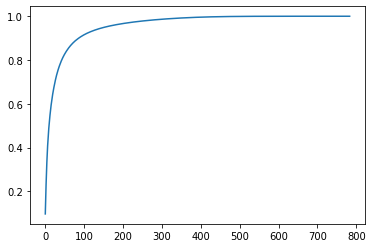


Минимальное количество главных компонент равно:  56 
Округленная дисперсия равна:  0.85


In [ ]:
cumulative = []

last = 0

for v in pca_full.explained_variance_ratio_:
  cumulative.append(last + v)
  last = cumulative[-1]

plt.plot(cumulative)
plt.show()

for i in range(len(cumulative)):
  if round(cumulative[i],2) > 0.84:
    print("\nМинимальное количество главных компонент равно: ", i, 
          "\nОкругленная дисперсия равна: ", round(cumulative[i],2))
    M = i
    break

In [ ]:
pca_min_components = PCA(n_components=M, svd_solver='full')

X_train_min = pca_min_components.fit(X_train).transform(X_train)
X_pred_min = pca_min_components.transform(X_pred)

explained_variance_min_components = np.round(np.cumsum(pca_min_components.explained_variance_ratio_),2)
explained_variance_min_components

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_min, y_train, test_size=0.3, random_state=95)


mean_zero = np.mean(X_train_split[:,0])

print(X_train_split[:,0])

print("\nСреднее значение: ", round(mean_zero,2))

[1278.31927711 -946.35423362  776.7612818  ...   55.20009025  478.01950655
  589.8028766 ]

Среднее значение:  2.97


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix

tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10,
                              max_depth=20, n_estimators=10, random_state=95)
clf = OneVsRestClassifier(tree).fit(X_train_split, y_train_split)

y_pred = clf.predict(X_test_split)
CM = confusion_matrix(y_test_split, y_pred)

print(CM)
print("\n\nКоличество верно классифицированных и относсящихся к классу 4: ", CM[4][4])

[[1643    0    8    3    3    7   20    6    8    3]
 [   2 1989   13    6    3    7    5    7    6    4]
 [  11   12 1661   23   10    7   11   28   38    8]
 [   5    5   55 1600    4   59    4   13   33   18]
 [   8   11   16    0 1603    9   24    8   16   71]
 [  22    3   11   68   14 1409   26    4   29   14]
 [  25    1   11    2    4   28 1720    0   11    0]
 [   9   19   22    7   35    7    1 1794   12   49]
 [  21   11   23   60   10   59    9    7 1480   25]
 [  14   12   10   26   73   11    3   34   14 1627]]


Количество верно классифицированных и относсящихся к классу 4:  1603


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', random_state=95)
clf_lr = OneVsRestClassifier(lr).fit(X_train_split, y_train_split)

y_pred_lr = clf_lr.predict(X_test_split)
CM_lr = confusion_matrix(y_test_split, y_pred)

print(CM_lr)
print("\n\nКоличество верно классифицированных и относсящихся к классу 6: ", CM_lr[6][6])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[[1643    0    8    3    3    7   20    6    8    3]
 [   2 1989   13    6    3    7    5    7    6    4]
 [  11   12 1661   23   10    7   11   28   38    8]
 [   5    5   55 1600    4   59    4   13   33   18]
 [   8   11   16    0 1603    9   24    8   16   71]
 [  22    3   11   68   14 1409   26    4   29   14]
 [  25    1   11    2    4   28 1720    0   11    0]
 [   9   19   22    7   35    7    1 1794   12   49]
 [  21   11   23   60   10   59    9    7 1480   25]
 [  14   12   10   26   73   11    3   34   14 1627]]


Количество верно классифицированных и относсящихся к классу 6:  1720


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="gini", min_samples_leaf=10, max_depth=20, random_state=95)
clf_dtc = OneVsRestClassifier(dtc).fit(X_train_split, y_train_split)

y_pred_dtc = clf_dtc.predict(X_test_split)
CM_dtc = confusion_matrix(y_test_split, y_pred)

print(CM_dtc)
print("\n\nКоличество верно классифицированных и относсящихся к классу 7: ", CM_dtc[7][7])

[[1643    0    8    3    3    7   20    6    8    3]
 [   2 1989   13    6    3    7    5    7    6    4]
 [  11   12 1661   23   10    7   11   28   38    8]
 [   5    5   55 1600    4   59    4   13   33   18]
 [   8   11   16    0 1603    9   24    8   16   71]
 [  22    3   11   68   14 1409   26    4   29   14]
 [  25    1   11    2    4   28 1720    0   11    0]
 [   9   19   22    7   35    7    1 1794   12   49]
 [  21   11   23   60   10   59    9    7 1480   25]
 [  14   12   10   26   73   11    3   34   14 1627]]


Количество верно классифицированных и относсящихся к классу 7:  1794


In [ ]:
import pandas as pd

data_pred = pd.read_csv("pred_for_task.csv", index_col="FileName")

data_X = data_pred.drop(columns=["Label"])

data_y = data_pred["Label"] 


data_X = pca_min_components.transform(data_X)

data_X = pd.DataFrame(data_X, index=[data_pred.index])

In [ ]:
file_3_x = data_X.loc["file3"]
file_1_x = data_X.loc["file1"]
file_23_x = data_X.loc["file23"]

file_3_y = data_y.loc["file3"]
file_1_y = data_y.loc["file1"]
file_23_y = data_y.loc["file23"]

predict_file_3 = clf.predict_proba(file_3_x) # Случайный лес
predict_file_1 = clf_lr.predict_proba(file_1_x) # Логистическая регрессия
predict_file_23 = clf_dtc.predict_proba(file_23_x) # Дерево принятия решений

print(round(predict_file_3[0][file_3_y],3))
print(round(predict_file_1[0][file_1_y],3))
print(round(predict_file_23[0][file_23_y],3))

0.998
0.915
0.989
